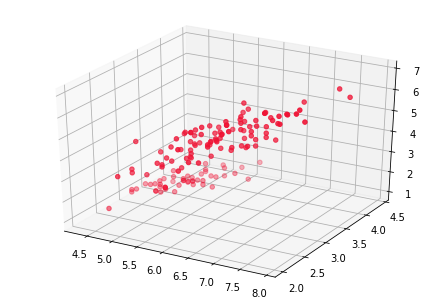

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plt.rcParams['figure.figsize'] = (20.0, 10.0)

header=['one','two','three','four','five']
dataT = pd.read_csv(r"D:\MOHAMED\Etudes\2CS\S2\ML\data\Iris\iris.data",names=header)
data = dataT.iloc[:,:-1].values

one = dataT['one'].values
two = dataT['two'].values
three = dataT['three'].values
four = dataT['four'].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(one, two, three,four, color='#ef1234')
plt.show()

In [16]:
# Maintenant on génère X, Y et Theta.
m = len(one)
x0 = np.ones(m)
X = np.array([x0, one, two, three]).T
Y = np.array(four)
# Initial Coefficients
Theta = np.array([0, 0, 0, 0])
alpha = 0.0001 # learning rate


In [17]:
#We’ll define our cost function.

def cost_function(X, Y, Theta):
    m = len(Y)
    J = np.sum((X.dot(Theta) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X, Y, Theta)
print(inital_cost)

1.0076666666666665


In [18]:
def gradient_descent(X, Y, Theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        # La foncion h : The Hypothesis
        h = X.dot(Theta)
        Difference = h - Y
        #Gradient: (h(x)-y)xj/m
        gradient = np.sum(X.T.dot(Difference)) / m
        # Changer les valeurs de Theta
        Theta = Theta - alpha * gradient
        # Nouvelle valeur de J
        cost = cost_function(X, Y, Theta)
        cost_history[iteration] = cost
        
    return Theta, cost_history


In [20]:
# 10000 Iterations
newTheta, cost_history = gradient_descent(X, Y, Theta, alpha, 100000)

# La nouvelle valeur de Theta
print(newTheta)

# La valeur de J correspondant à la nouvelle valeur de Theta
print(cost_history[-1])

[0.09389895 0.09389895 0.09389895 0.09389895]
0.1600877760470955


In [21]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newTheta)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

0.5658405712691438
0.4465720166521756
